# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:

df = pd.read_excel("/content/4.3 Customer Booking Data.xlsx")
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.isnull().sum()


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [ ]:
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [ ]:
df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [ ]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type'], drop_first=True)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  int64  
 5   route                  50000 non-null  object 
 6   booking_origin         50000 non-null  object 
 7   wants_extra_baggage    50000 non-null  int64  
 8   wants_preferred_seat   50000 non-null  int64  
 9   wants_in_flight_meals  50000 non-null  int64  
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  int64  
 12  sales_channel_Mobile   50000 non-null  bool   
 13  trip_type_OneWay       50000 non-null  bool   
 14  trip_type_RoundTrip    50000 non-null  bool   
dtypes:

In [ ]:
boolean_columns = ['sales_channel_Mobile', 'trip_type_OneWay', 'trip_type_RoundTrip']

for column in boolean_columns:
    df[column] = df[column].astype(int)

# Create the new 'trip_type(one_or_round)' column
df['trip_type(one_or_round)'] = df['trip_type_OneWay'].apply(lambda x: 'OneWay' if x == 1 else 'RoundTrip')

# Drop the original 'trip_type_OneWay' and 'trip_type_RoundTrip' columns
df.drop(columns=['trip_type_OneWay', 'trip_type_RoundTrip'], inplace=True)

print(df)


       num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0                   2            262              19            7           6   
1                   1            112              20            3           6   
2                   2            243              22           17           3   
3                   1             96              31            4           6   
4                   2             68              22           15           3   
...               ...            ...             ...          ...         ...   
49995               2             27               6            9           6   
49996               1            111               6            4           7   
49997               1             24               6           22           6   
49998               1             15               6           11           1   
49999               1             19               6           10           4   

        route booking_origi

In [ ]:
df['trip_type(one_or_round)'].unique()

array(['RoundTrip', 'OneWay'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column
df['trip_type(one_or_round)'] = label_encoder.fit_transform(df['trip_type(one_or_round)'])


In [ ]:
df.head()


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type(one_or_round)
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_passengers           50000 non-null  int64  
 1   purchase_lead            50000 non-null  int64  
 2   length_of_stay           50000 non-null  int64  
 3   flight_hour              50000 non-null  int64  
 4   flight_day               50000 non-null  int64  
 5   route                    50000 non-null  object 
 6   booking_origin           50000 non-null  object 
 7   wants_extra_baggage      50000 non-null  int64  
 8   wants_preferred_seat     50000 non-null  int64  
 9   wants_in_flight_meals    50000 non-null  int64  
 10  flight_duration          50000 non-null  float64
 11  booking_complete         50000 non-null  int64  
 12  sales_channel_Mobile     50000 non-null  int64  
 13  trip_type(one_or_round)  50000 non-null  int64  
dtypes: float64(1), int64(1

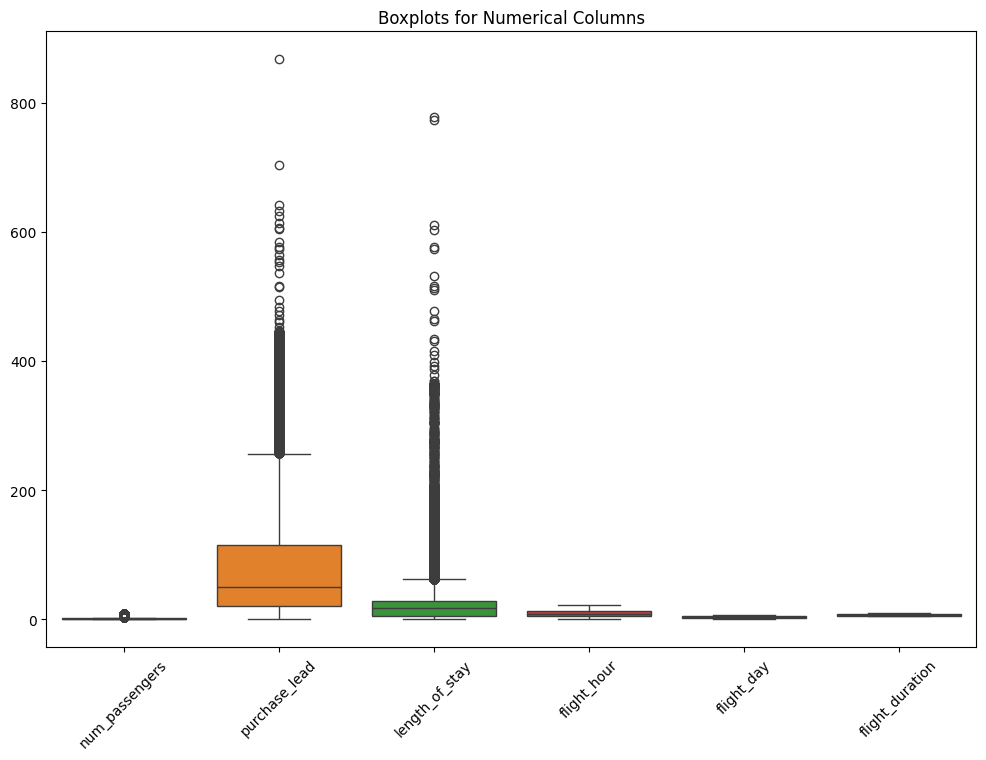

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration']

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplots for Numerical Columns')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type(one_or_round)
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,1


In [ ]:
df.isnull().sum()


num_passengers             0
purchase_lead              0
length_of_stay             0
flight_hour                0
flight_day                 0
route                      0
booking_origin             0
wants_extra_baggage        0
wants_preferred_seat       0
wants_in_flight_meals      0
flight_duration            0
booking_complete           0
sales_channel_Mobile       0
trip_type(one_or_round)    0
dtype: int64

In [ ]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
print(df.shape)


(50000, 14)


In [ ]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type(one_or_round)
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_passengers           50000 non-null  int64  
 1   purchase_lead            50000 non-null  int64  
 2   length_of_stay           50000 non-null  int64  
 3   flight_hour              50000 non-null  int64  
 4   flight_day               50000 non-null  int64  
 5   route                    50000 non-null  object 
 6   booking_origin           50000 non-null  object 
 7   wants_extra_baggage      50000 non-null  int64  
 8   wants_preferred_seat     50000 non-null  int64  
 9   wants_in_flight_meals    50000 non-null  int64  
 10  flight_duration          50000 non-null  float64
 11  booking_complete         50000 non-null  int64  
 12  sales_channel_Mobile     50000 non-null  int64  
 13  trip_type(one_or_round)  50000 non-null  int64  
dtypes: float64(1), int64(1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_passengers           50000 non-null  int64  
 1   purchase_lead            50000 non-null  int64  
 2   length_of_stay           50000 non-null  int64  
 3   flight_hour              50000 non-null  int64  
 4   flight_day               50000 non-null  int64  
 5   route                    50000 non-null  object 
 6   booking_origin           50000 non-null  object 
 7   wants_extra_baggage      50000 non-null  int64  
 8   wants_preferred_seat     50000 non-null  int64  
 9   wants_in_flight_meals    50000 non-null  int64  
 10  flight_duration          50000 non-null  float64
 11  booking_complete         50000 non-null  int64  
 12  sales_channel_Mobile     50000 non-null  int64  
 13  trip_type(one_or_round)  50000 non-null  int64  
dtypes: float64(1), int64(1

In [ ]:
df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [ ]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode booking_origin and route columns
df['booking_origin_encoded'] = label_encoder.fit_transform(df['booking_origin'])
df['route_encoded'] = label_encoder.fit_transform(df['route'])

# Display the first few rows to verify the changes
print(df[['booking_origin', 'booking_origin_encoded', 'route', 'route_encoded']].head())



  booking_origin  booking_origin_encoded   route  route_encoded
0    New Zealand                      61  AKLDEL              0
1    New Zealand                      61  AKLDEL              0
2          India                      36  AKLDEL              0
3    New Zealand                      61  AKLDEL              0
4          India                      36  AKLDEL              0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_passengers           50000 non-null  int64  
 1   purchase_lead            50000 non-null  int64  
 2   length_of_stay           50000 non-null  int64  
 3   flight_hour              50000 non-null  int64  
 4   flight_day               50000 non-null  int64  
 5   route                    50000 non-null  object 
 6   booking_origin           50000 non-null  object 
 7   wants_extra_baggage      50000 non-null  int64  
 8   wants_preferred_seat     50000 non-null  int64  
 9   wants_in_flight_meals    50000 non-null  int64  
 10  flight_duration          50000 non-null  float64
 11  booking_complete         50000 non-null  int64  
 12  sales_channel_Mobile     50000 non-null  int64  
 13  trip_type(one_or_round)  50000 non-null  int64  
 14  booking_origin_encoded

In [ ]:
# Drop the 'booking_origin' and 'route' columns from the DataFrame
df.drop(['booking_origin', 'route'], axis=1, inplace=True)

# Display the first few rows of the DataFrame to verify the changes
df.head()


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type(one_or_round),booking_origin_encoded,route_encoded
0,2,262,19,7,6,1,0,0,5.52,0,0,1,61,0
1,1,112,20,3,6,0,0,0,5.52,0,0,1,61,0
2,2,243,22,17,3,1,1,0,5.52,0,0,1,36,0
3,1,96,31,4,6,0,0,1,5.52,0,0,1,61,0
4,2,68,22,15,3,1,0,1,5.52,0,0,1,36,0


In [ ]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type(one_or_round),booking_origin_encoded,route_encoded
0,2,262,19,7,6,1,0,0,5.52,0,0,1,61,0
1,1,112,20,3,6,0,0,0,5.52,0,0,1,61,0
2,2,243,22,17,3,1,1,0,5.52,0,0,1,36,0
3,1,96,31,4,6,0,0,1,5.52,0,0,1,61,0
4,2,68,22,15,3,1,0,1,5.52,0,0,1,36,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_passengers           50000 non-null  int64  
 1   purchase_lead            50000 non-null  int64  
 2   length_of_stay           50000 non-null  int64  
 3   flight_hour              50000 non-null  int64  
 4   flight_day               50000 non-null  int64  
 5   wants_extra_baggage      50000 non-null  int64  
 6   wants_preferred_seat     50000 non-null  int64  
 7   wants_in_flight_meals    50000 non-null  int64  
 8   flight_duration          50000 non-null  float64
 9   booking_complete         50000 non-null  int64  
 10  sales_channel_Mobile     50000 non-null  int64  
 11  trip_type(one_or_round)  50000 non-null  int64  
 12  booking_origin_encoded   50000 non-null  int64  
 13  route_encoded            50000 non-null  int64  
dtypes: float64(1), int64(1

In [ ]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type(one_or_round),booking_origin_encoded,route_encoded
0,2,262,19,7,6,1,0,0,5.52,0,0,1,61,0
1,1,112,20,3,6,0,0,0,5.52,0,0,1,61,0
2,2,243,22,17,3,1,1,0,5.52,0,0,1,36,0
3,1,96,31,4,6,0,0,1,5.52,0,0,1,61,0
4,2,68,22,15,3,1,0,1,5.52,0,0,1,36,0


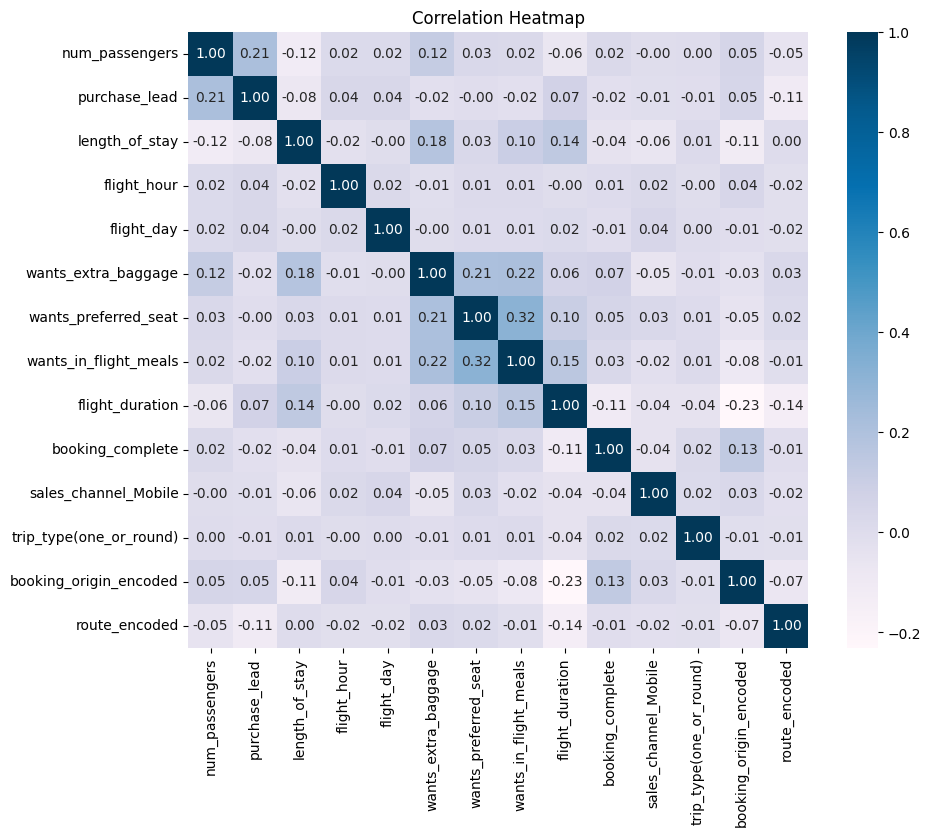

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)


                         num_passengers  purchase_lead  length_of_stay  \
num_passengers                 1.000000       0.212606       -0.115850   
purchase_lead                  0.212606       1.000000       -0.076560   
length_of_stay                -0.115850      -0.076560        1.000000   
flight_hour                    0.015607       0.035973       -0.024872   
flight_day                     0.015407       0.036531       -0.000310   
wants_extra_baggage            0.120404      -0.022207        0.176757   
wants_preferred_seat           0.028544      -0.004499        0.032264   
wants_in_flight_meals          0.022943      -0.022653        0.098828   
flight_duration               -0.063169       0.067866        0.141181   
booking_complete               0.024116      -0.022131       -0.042408   
sales_channel_Mobile          -0.002457      -0.013399       -0.060352   
trip_type(one_or_round)        0.002195      -0.006452        0.013053   
booking_origin_encoded         0.05234

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define the numerical columns to be normalized
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day',
                     'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
                     'flight_duration', 'booking_complete']

# Normalize all numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the DataFrame to verify the changes
print(df.head())


   num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0           0.125       0.302191        0.024422     0.304348    0.833333   
1           0.000       0.129181        0.025707     0.130435    0.833333   
2           0.125       0.280277        0.028278     0.739130    0.333333   
3           0.000       0.110727        0.039846     0.173913    0.833333   
4           0.125       0.078431        0.028278     0.652174    0.333333   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                  1.0                   0.0                    0.0   
1                  0.0                   0.0                    0.0   
2                  1.0                   1.0                    0.0   
3                  0.0                   0.0                    1.0   
4                  1.0                   0.0                    1.0   

   flight_duration  booking_complete  sales_channel_Mobile  \
0         0.175983               0.0            

In [ ]:
# Feature creation: Datetime features
df['is_weekend'] = df['flight_day'].apply(lambda x: 1 if x in ['Sat', 'Sun'] else 0)


In [ ]:
# Feature creation: Interaction feature
df['lead_stay_interaction'] = df['purchase_lead'] * df['length_of_stay']


In [ ]:
# Step 1: Split data into features and target variable

X = df.drop('booking_complete', axis=1)
y = df['booking_complete']


In [ ]:
from sklearn.model_selection import train_test_split
# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Train a Random Forest model to get feature importance
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred= rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8546


Accuracy: 0.8546
Confusion Matrix:
[[8408  112]
 [1342  138]]


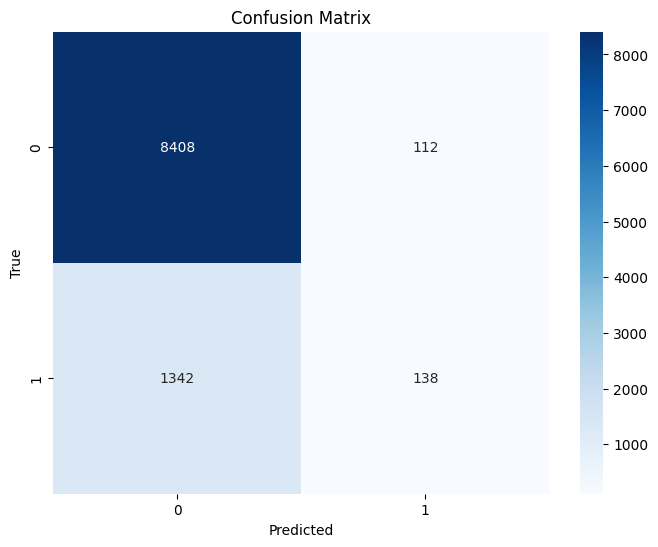

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      8520
         1.0       0.55      0.09      0.16      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.54     10000
weighted avg       0.82      0.85      0.81     10000



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test set results
y_pred = rf_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_passengers           50000 non-null  float64
 1   purchase_lead            50000 non-null  float64
 2   length_of_stay           50000 non-null  float64
 3   flight_hour              50000 non-null  float64
 4   flight_day               50000 non-null  float64
 5   wants_extra_baggage      50000 non-null  float64
 6   wants_preferred_seat     50000 non-null  float64
 7   wants_in_flight_meals    50000 non-null  float64
 8   flight_duration          50000 non-null  float64
 9   booking_complete         50000 non-null  float64
 10  sales_channel_Mobile     50000 non-null  int64  
 11  trip_type(one_or_round)  50000 non-null  int64  
 12  booking_origin_encoded   50000 non-null  int64  
 13  route_encoded            50000 non-null  int64  
 14  is_weekend            

In [ ]:
df['route_encoded'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 125,
       126, 127, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       185, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 19

In [ ]:
df['booking_origin_encoded'].unique()

array([ 61,  36, 100,  17,  85,  43,  51,  80,  90,  28,  37,  21, 103,
        93,  86,  75,  40,  42,  81,  99,  95,  77,   0,  78,  59,  74,
        34,  71,  87,  27,  19, 101,  48,  35,  73,  20,   4,  14,  72,
         9,  65,   7,  45,  11,  97,  46,  91,  12,  16,  13,  98,  23,
        18,  38,   6,  83,  82,  54,  58,  76,  47,  55,  89,   5,  49,
        44,  31,  56,  15,  92,  70,  94,   3,  60,  50,  57,  64,  67,
        10,  63,  26,  62,  52,  24,  41,  96,  84,  68,  69,  25,  79,
         1,  32,  22,  53, 102,   8,  66,  39,  29,  30,  33,   2,  88])

In [ ]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type(one_or_round),booking_origin_encoded,route_encoded,is_weekend,lead_stay_interaction
0,0.125,0.302191,0.024422,0.304348,0.833333,1.0,0.0,0.0,0.175983,0.0,0,1,61,0,0,0.007380
1,0.000,0.129181,0.025707,0.130435,0.833333,0.0,0.0,0.0,0.175983,0.0,0,1,61,0,0,0.003321
2,0.125,0.280277,0.028278,0.739130,0.333333,1.0,1.0,0.0,0.175983,0.0,0,1,36,0,0,0.007926
3,0.000,0.110727,0.039846,0.173913,0.833333,0.0,0.0,1.0,0.175983,0.0,0,1,61,0,0,0.004412
4,0.125,0.078431,0.028278,0.652174,0.333333,1.0,0.0,1.0,0.175983,0.0,0,1,36,0,0,0.002218


In [ ]:
import joblib

# Specify the filename for the saved model
model_filename = 'random_forest_model.pkl'

# Save the model to disk
joblib.dump(rf_model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as random_forest_model.pkl
